In [2]:
import nengo
import numpy as np
import pylab as plt

%matplotlib widget

In [ ]:
# Use NxSDK backend on Loihi
import nengo_loihi
nengo_loihi.set_defaults()

In [8]:
with nengo.Network(label="MLP") as model:
    sin_node = nengo.Node(output=np.sin)
    ens = nengo.Ensemble(n_neurons=100, dimensions=1, neuron_type=nengo.AdaptiveLIF())
    nengo.Connection(sin_node, ens)
    ens_probe = nengo.Probe(ens)

In [5]:
with nengo.Simulator(model) as sim:
    sim.run(10)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

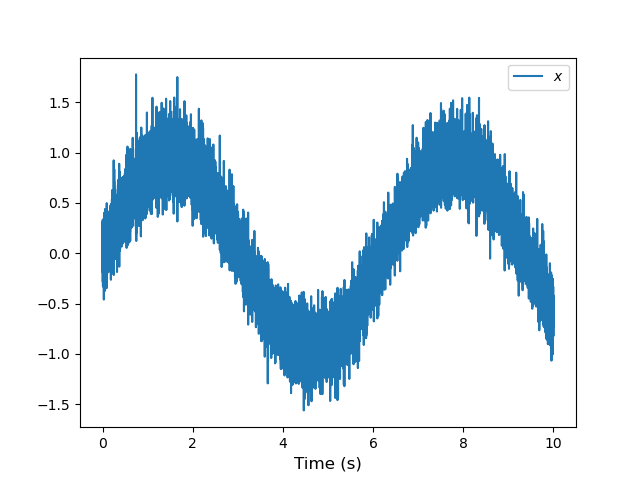

In [6]:
def plot_over_time(t, data):
    plt.figure()
    plt.plot(t, data[ens_probe])
    plt.xlabel("Time (s)", fontsize="large")
    plt.legend(["$x$"])


plot_over_time(t, sim.data)